In [1]:
# Importing Libraries
from tensorflow.keras.utils import get_file
import tarfile
from glob import glob
import os,re,string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords,wordnet
import contractions
# Download the stopwords dataset from NLTK
nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saiko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saiko\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [ ]:
# Importing Libraries
from tensorflow.keras.utils import get_file
import tarfile
from glob import glob
import os,re,string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords,wordnet
import contractions
# Download the stopwords dataset from NLTK
nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import LSTM, Bidirectional, GRU,Reshape


def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text
def remove_special_characters(text):
    special_chars = r'!"\'#$%&()*+/:;,<=>@[\\]^`{|}~'
    cleaned_text = re.sub('[' + re.escape(special_chars) + ']', '', text.lower())
    return cleaned_text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to perform lemmatization and stemming
def lemmatize_and_stem(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize each word based on its part of speech
    
    # Stem each word
    stem_words = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(stem_words)
import os
import pandas as pd

def read_imdb_data(directory_path):
    data = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read().strip()
            data.append(text)
    return data

def create_imdb_dataframe(negative_directory_path, positive_directory_path):
    negative_data = read_imdb_data(negative_directory_path)
    positive_data = read_imdb_data(positive_directory_path)

    # Create a pandas DataFrame with two columns: 'text' and 'sentiment'
    df = pd.DataFrame({'text': negative_data + positive_data,
                       'sentiment': [0] * len(negative_data) + [1] * len(positive_data)})
    
    return df

# Replace 'negative_directory_path' and 'positive_directory_path' with the actual paths to your IMDb dataset text files
train_negative_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/train/neg'
train_positive_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/train/pos'
test_negative_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/test/neg'
test_positive_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/test/pos'

# Load the IMDb dataset into a pandas DataFrame
imdb_df_train = create_imdb_dataframe(train_negative_directory_path, train_positive_directory_path)
imdb_df_test = create_imdb_dataframe(test_negative_directory_path, test_positive_directory_path)

# Now, you can work with the 'imdb_df' DataFrame, which contains the IMDb dataset
imdb_df_train['text'] = imdb_df_train['text'].apply(remove_special_characters)
imdb_df_train['text'] = imdb_df_train['text'].apply(remove_stopwords)
imdb_df_train['text'] = imdb_df_train['text'].apply(expand_contractions)
imdb_df_train['text'] = imdb_df_train['text'].apply(lemmatize_and_stem)

imdb_df_test['text'] = imdb_df_test['text'].apply(remove_special_characters)
imdb_df_test['text'] = imdb_df_test['text'].apply(remove_stopwords)
imdb_df_test['text'] = imdb_df_test['text'].apply(expand_contractions)
imdb_df_test['text'] = imdb_df_test['text'].apply(lemmatize_and_stem)

# Tokenization using Keras
max_num_words = 10000
max_sequence_length = 1000

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(imdb_df_train['text'])

sequences_train = tokenizer.texts_to_sequences(imdb_df_train['text'])
padded_sequences_train = pad_sequences(sequences_train, maxlen=max_sequence_length,padding='post')

labels = imdb_df_train['sentiment'].values
x_train, x_val, y_train, y_val = train_test_split(padded_sequences_train, labels, test_size=0.2, random_state=42)

embedding_dim = 100
filters1 = 128
filters2 = 64
kernel_size = 5
hidden_dims = 64

embedding_dim = 100
filters1 = 128
filters2 = 64
kernel_size = 5
hidden_dims = 64
l2_lambda = 0.01
model = Sequential()
model.add(Embedding(input_dim=max_num_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters1, kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Conv1D(filters2, kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val, y_val),verbose=1,batch_size=512)

model_history = pd.DataFrame(history.history)

import matplotlib.pyplot as plt

# Access training and validation history
training_loss = model_history['loss']
validation_loss = model_history['val_loss']
training_accuracy = model_history['acc']
validation_accuracy = model_history['val_acc']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, 20), training_loss, label='Training Loss')
plt.plot(range(0, 20), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(0, 20), training_accuracy, label='Training Accuracy')
plt.plot(range(0, 20), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


import joblib
model_save_path = 'model.pkl'
joblib.dump(model, model_save_path)


In [3]:
def remove_special_characters(text):
    special_chars = r'!"\'#$%&()*+/:;,<=>@[\\]^`{|}~'
    cleaned_text = re.sub('[' + re.escape(special_chars) + ']', '', text.lower())
    return cleaned_text

In [4]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [5]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to perform lemmatization and stemming
def lemmatize_and_stem(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize each word based on its part of speech
    
    # Stem each word
    stem_words = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(stem_words)




In [7]:
import os
import pandas as pd

def read_imdb_data(directory_path):
    data = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read().strip()
            data.append(text)
    return data

def create_imdb_dataframe(negative_directory_path, positive_directory_path):
    negative_data = read_imdb_data(negative_directory_path)
    positive_data = read_imdb_data(positive_directory_path)

    # Create a pandas DataFrame with two columns: 'text' and 'sentiment'
    df = pd.DataFrame({'text': negative_data + positive_data,
                       'sentiment': [0] * len(negative_data) + [1] * len(positive_data)})
    
    return df

# Replace 'negative_directory_path' and 'positive_directory_path' with the actual paths to your IMDb dataset text files
train_negative_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/train/neg'
train_positive_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/train/pos'
test_negative_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/test/neg'
test_positive_directory_path = 'C:/Users/saiko/OneDrive/Desktop/657/Assign-3/aclImdb/test/pos'

# Load the IMDb dataset into a pandas DataFrame
imdb_df_train = create_imdb_dataframe(train_negative_directory_path, train_positive_directory_path)
imdb_df_test = create_imdb_dataframe(test_negative_directory_path, test_positive_directory_path)

# Now, you can work with the 'imdb_df' DataFrame, which contains the IMDb dataset


In [8]:
imdb_df_train['text'] = imdb_df_train['text'].apply(remove_special_characters)
imdb_df_train['text'] = imdb_df_train['text'].apply(remove_stopwords)
imdb_df_train['text'] = imdb_df_train['text'].apply(expand_contractions)
imdb_df_train['text'] = imdb_df_train['text'].apply(lemmatize_and_stem)

In [9]:
imdb_df_test['text'] = imdb_df_test['text'].apply(remove_special_characters)
imdb_df_test['text'] = imdb_df_test['text'].apply(remove_stopwords)
imdb_df_test['text'] = imdb_df_test['text'].apply(expand_contractions)
imdb_df_test['text'] = imdb_df_test['text'].apply(lemmatize_and_stem)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import LSTM, Bidirectional, GRU,Reshape

In [39]:
# Tokenization using Keras
max_num_words = 10000
max_sequence_length = 1000

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(imdb_df_train['text'])

sequences_train = tokenizer.texts_to_sequences(imdb_df_train['text'])
padded_sequences_train = pad_sequences(sequences_train, maxlen=max_sequence_length,padding='post')

In [40]:
sequences_test = tokenizer.texts_to_sequences(imdb_df_test['text'])
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length,padding='post')

In [41]:
labels = imdb_df_train['sentiment'].values
x_train, x_val, y_train, y_val = train_test_split(padded_sequences_train, labels, test_size=0.2, random_state=42)

In [42]:
x_train.shape

(20000, 1000)

In [43]:
embedding_dim = 100
filters1 = 128
filters2 = 64
kernel_size = 5
hidden_dims = 64

In [ ]:
embedding_dim = 100
filters1 = 128
filters2 = 64
kernel_size = 5
hidden_dims = 64
l2_lambda = 0.01
model = Sequential()
model.add(Embedding(input_dim=max_num_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters1, kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Conv1D(filters2, kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val, y_val),verbose=1,batch_size=512)

In [44]:
l2_lambda = 0.01

In [64]:
word_size = len(tokenizer.word_index)+1

model = keras.Sequential()
model.add(keras.layers.Embedding(word_size, 16))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv1D(filters=16,kernel_size=2,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          1099936   
                                                                 
 dropout_9 (Dropout)         (None, None, 16)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 16)          528       
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                      

In [67]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val, y_val),verbose=1,batch_size=512)

Epoch 1/20
40/40 [==============================] - 7s 150ms/step - loss: 0.6931 - acc: 0.5002 - val_loss: 0.6928 - val_acc: 0.6532
Epoch 2/20
40/40 [==============================] - 6s 142ms/step - loss: 0.6920 - acc: 0.5735 - val_loss: 0.6900 - val_acc: 0.5748
Epoch 3/20
40/40 [==============================] - 5s 137ms/step - loss: 0.6854 - acc: 0.6435 - val_loss: 0.6766 - val_acc: 0.6582
Epoch 4/20
40/40 [==============================] - 6s 142ms/step - loss: 0.6579 - acc: 0.7079 - val_loss: 0.6289 - val_acc: 0.7914
Epoch 5/20
40/40 [==============================] - 6s 138ms/step - loss: 0.5829 - acc: 0.7912 - val_loss: 0.5291 - val_acc: 0.8182
Epoch 6/20
40/40 [==============================] - 6s 146ms/step - loss: 0.4787 - acc: 0.8281 - val_loss: 0.4310 - val_acc: 0.8396
Epoch 7/20
40/40 [==============================] - 6s 146ms/step - loss: 0.3938 - acc: 0.8561 - val_loss: 0.3690 - val_acc: 0.8596
Epoch 8/20
40/40 [==============================] - 6s 142ms/step - loss: 0.

In [68]:
model_history = pd.DataFrame(history.history)

In [69]:
model_history

,loss,acc,val_loss,val_acc
0,0.693115,0.50015,0.692800,0.6532
1,0.691961,0.57345,0.690007,0.5748
2,0.685375,0.64345,0.676562,0.6582
3,0.657948,0.70790,0.628859,0.7914
4,0.582870,0.79125,0.529059,0.8182
5,0.478658,0.82805,0.430959,0.8396
6,0.393761,0.85610,0.369005,0.8596
7,0.335538,0.87665,0.330953,0.8738
8,0.305356,0.88445,0.310772,0.8804
9,0.281202,0.89330,0.298453,0.8826


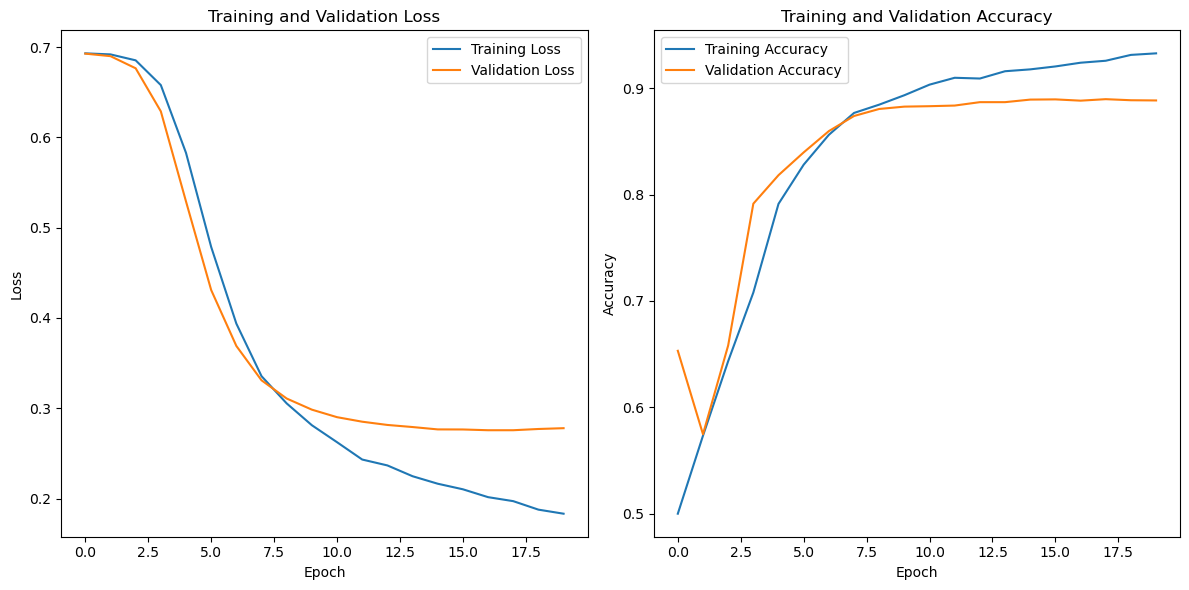

In [70]:
import matplotlib.pyplot as plt

# Access training and validation history
training_loss = model_history['loss']
validation_loss = model_history['val_loss']
training_accuracy = model_history['acc']
validation_accuracy = model_history['val_acc']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, 20), training_loss, label='Training Loss')
plt.plot(range(0, 20), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(0, 20), training_accuracy, label='Training Accuracy')
plt.plot(range(0, 20), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [ ]:
import joblib
model_save_path = 'model.pkl'
joblib.dump(model, model_save_path)

In [71]:
test_labels = imdb_df_test['sentiment'].values


In [72]:
scores = model.evaluate(padded_sequences_test,test_labels)
test_accuracy = scores[1]
print('accuracy on testing set:',test_accuracy*100)
     

782/782 [==============================] - 2s 3ms/step - loss: 0.2971 - acc: 0.8808
accuracy on testing set: 88.07600140571594
